<a href="https://colab.research.google.com/github/aadityacs/FourierTOuNN/blob/main/FourierTOuNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# run this first time to clone the directory 
!git clone https://github.com/aadityacs/FourierTOuNN.git
%cd FourierTOuNN/

fatal: destination path 'FourierTOuNN' already exists and is not an empty directory.
/content/FourierTOuNN


### Imports

In [2]:
import numpy as np
import time
from TOuNN import TopologyOptimizer
import matplotlib.pyplot as plt

### Mesh 

In [3]:
nelx = 60; # number of FE elements along X
nely = 30; # number of FE elements along Y
elemSize = np.array([1.0,1.0]);
mesh = {'nelx':nelx, 'nely':nely, 'elemSize':elemSize};

### Material

In [4]:
matProp = {'E':1.0, 'nu':0.3}; # Structural
matProp['K'] = 1.0; # Thermal
matProp['penal'] = 1; # SIMP penalization constant, starting value

### Boundary Condition

In [5]:
exampleName = 'TipCantilever'
physics = 'Structural'
ndof = 2*(nelx+1)*(nely+1);
force = np.zeros((ndof,1))
dofs=np.arange(ndof);
fixed = dofs[0:2*(nely+1):1];
force[2*(nelx+1)*(nely+1)-2*nely+1, 0 ] = -1;
symXAxis = {'isOn':False, 'midPt':0.5*nely};
symYAxis = {'isOn':False, 'midPt':0.5*nelx};
bc = {'exampleName':exampleName, 'physics':physics, \
      'force':force, 'fixed':fixed, 'symXAxis':symXAxis, 'symYAxis':symYAxis };

# For more BCs see examples.py

### NN Settings

In [6]:
nnSettings = {'numLayers':1, 'numNeuronsPerLyr':20 }

### Fourier Settings

In [7]:
fourierMinRadius, fourierMaxRadius = 4, 10;
numTerms = 250;
fourierMap = {'isOn':True, 'minRadius':fourierMinRadius, \
              'maxRadius':fourierMaxRadius, 'numTerms':numTerms};

### Constraints and Projections

In [11]:
densityProjection = {'isOn':True, 'sharpness':8};
desiredVolumeFraction = 0.6;

### Optimizer settings

In [12]:
minEpochs = 150; # minimum number of iterations
maxEpochs = 500; # Max number of iterations

Running on CPU


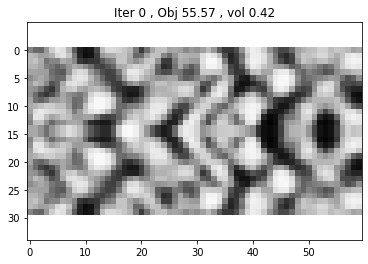

Iter 0 , Obj 55.57 , vol 0.42


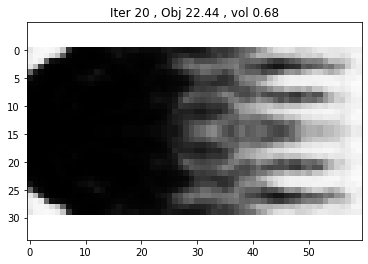

Iter 20 , Obj 22.44 , vol 0.68


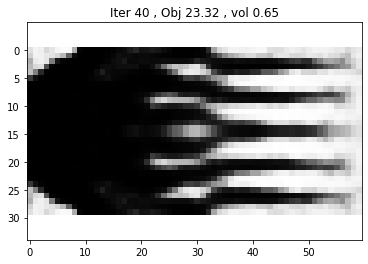

Iter 40 , Obj 23.32 , vol 0.65


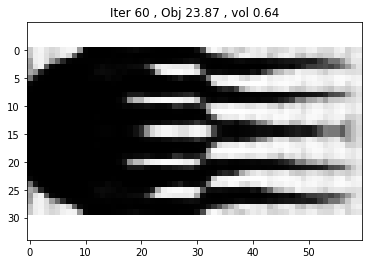

Iter 60 , Obj 23.87 , vol 0.64


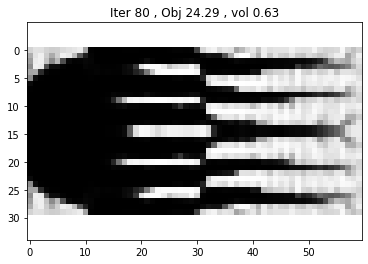

Iter 80 , Obj 24.29 , vol 0.63


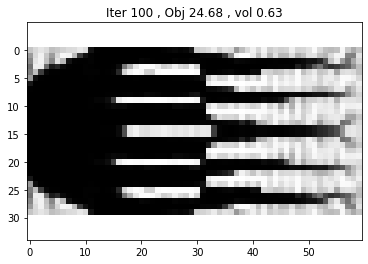

Iter 100 , Obj 24.68 , vol 0.63


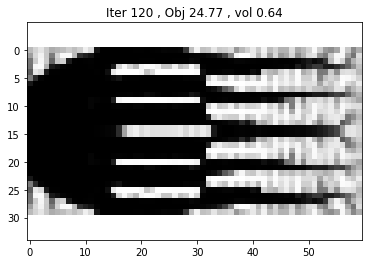

Iter 120 , Obj 24.77 , vol 0.64


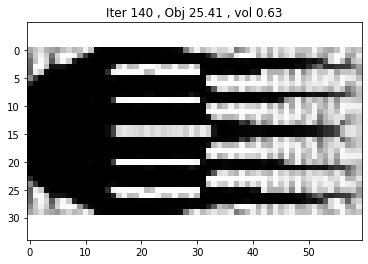

Iter 140 , Obj 25.41 , vol 0.63


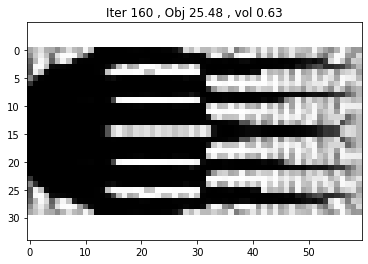

Iter 160 , Obj 25.48 , vol 0.63


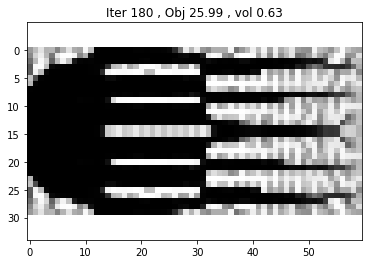

Iter 180 , Obj 25.99 , vol 0.63


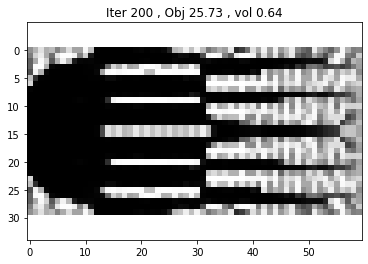

Iter 200 , Obj 25.73 , vol 0.64


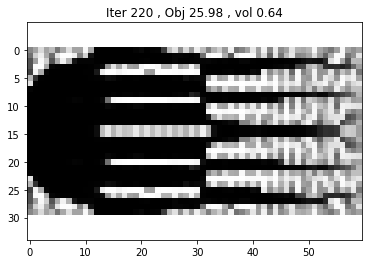

Iter 220 , Obj 25.98 , vol 0.64


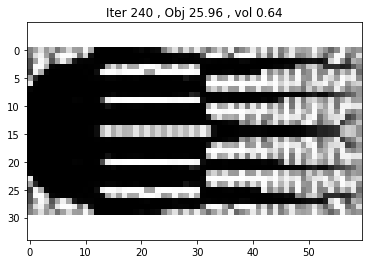

Iter 240 , Obj 25.96 , vol 0.64


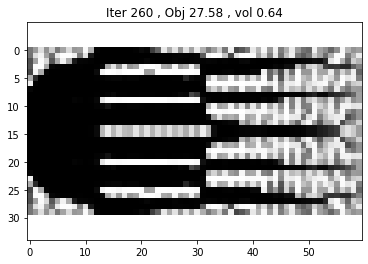

Iter 260 , Obj 27.58 , vol 0.64


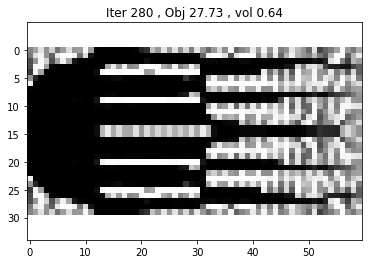

Iter 280 , Obj 27.73 , vol 0.64


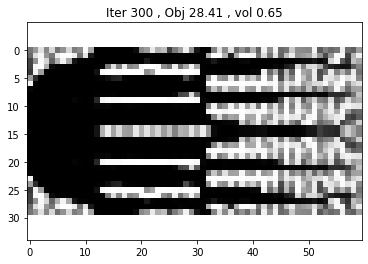

Iter 300 , Obj 28.41 , vol 0.65


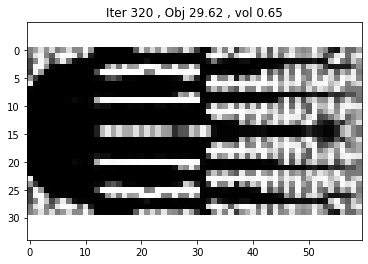

Iter 320 , Obj 29.62 , vol 0.65


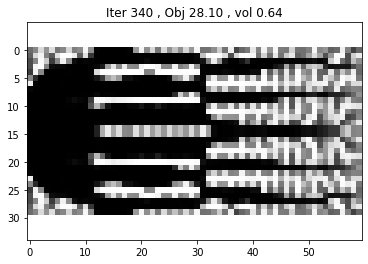

Iter 340 , Obj 28.10 , vol 0.64


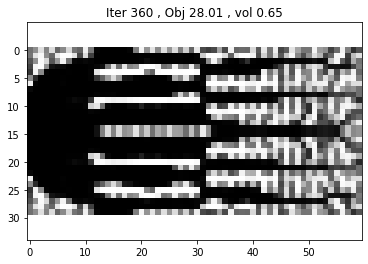

Iter 360 , Obj 28.01 , vol 0.65


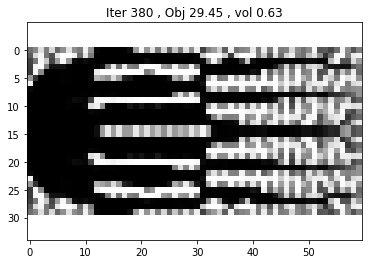

Iter 380 , Obj 29.45 , vol 0.63


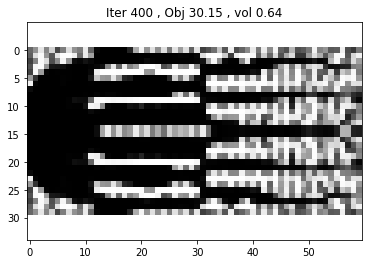

Iter 400 , Obj 30.15 , vol 0.64


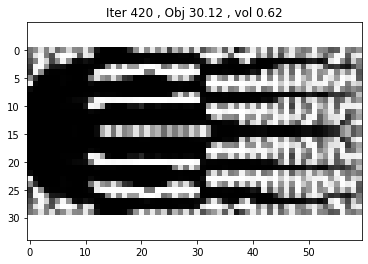

Iter 420 , Obj 30.12 , vol 0.62


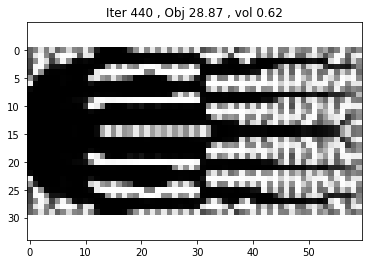

Iter 440 , Obj 28.87 , vol 0.62


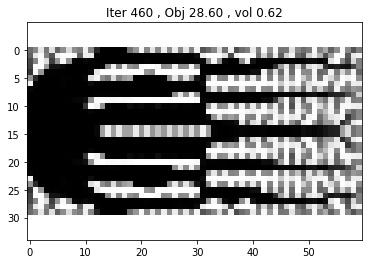

Iter 460 , Obj 28.60 , vol 0.62


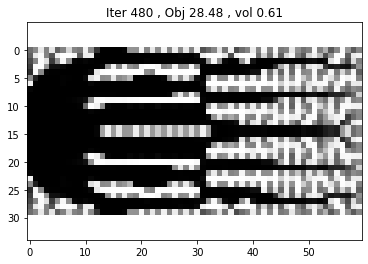

Iter 480 , Obj 28.48 , vol 0.61


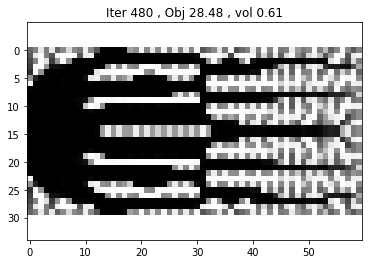

499 J: 28.29; Vf: 0.614; loss: 0.522; relGreyElems: 0.143 
Final J : 28.291


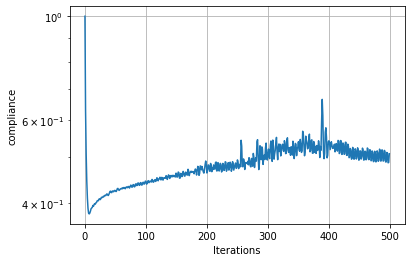

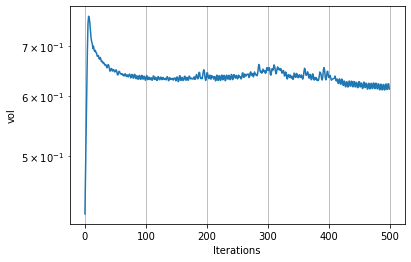

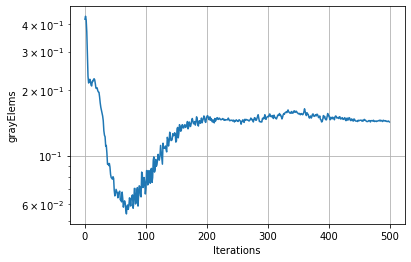

<Figure size 432x288 with 0 Axes>

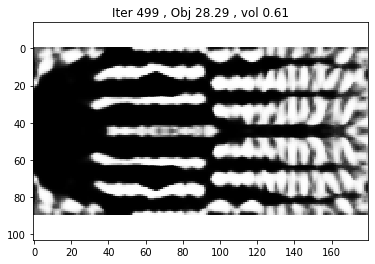

Time taken (secs): 34.23


In [13]:
plt.close('all');
overrideGPU = False
start = time.perf_counter()
topOpt = TopologyOptimizer(mesh, matProp, bc, nnSettings, fourierMap, \
                  desiredVolumeFraction, densityProjection, overrideGPU);
topOpt.optimizeDesign(maxEpochs,minEpochs);
print("Time taken (secs): {:.2F}".format( time.perf_counter() - start))